# Figure 7: Biological synaptic updates

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import h5py

import EIANN.utils as ut
import EIANN.plot as pt
from EIANN.generate_figures import *

pt.update_plot_defaults()
root_dir = ut.get_project_root()

%load_ext autoreload
%autoreload 2

In [2]:
figure_name = "Fig5_BTSP_BCM_HebbWN"

model_list = ["bpLike_WT_hebbdend", "BTSP_WT_hebbdend", "Supervised_BCM_WT_hebbdend",
              "SupHebbTempCont_WT_hebbdend", "Supervised_HebbWN_WT_hebbdend", "bpDale_fixed"]

model_dict_all = load_model_dict()
generate_hdf5_all_seeds(model_list, model_dict_all, recompute=None, variables_to_save = ['val_history_train_steps', 'dendritic_state', 'angle_vs_bp'])

In [5]:
def plot_learning_rule_diagram(axes_list):
    a_pre = 1  # presynaptic activation
    d = np.linspace(-1, 1, 100) # dendritic state
    mathfont = 'cm'
    # mathfont = 'stix'
    pad = -1

    # Linear Dendritic State (LDS, used in Backprop)
    dW_BP = d*a_pre
    ax = axes_list[0]
    ax.plot(d, dW_BP, color='black', linewidth=1.)
    ax.hlines(0, -1, 1, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    ax.vlines(0, -1, 1, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    ax.set_ylabel(r'$\Delta W$', math_fontfamily=mathfont, fontsize=10, rotation=0, labelpad=5, y=0.4)
    ax.set_xlabel('     $\hat{d}$', math_fontfamily=mathfont, fontsize=10, labelpad=pad, loc='center')
    ax.set_xticks([0])
    ax.set_yticks([-1, 0, 1])
    ax.set_title('Linear Dendritic State (LDS)', fontsize=8)

    # BTSP
    w_max = 2
    temporal_discount=0.1
    dep_th=0.01
    dep_width=0.01
    q_dep = ut.get_scaled_rectified_sigmoid(dep_th, dep_th + dep_width)

    colors = ['deepskyblue', 'royalblue', 'darkblue']
    ax = axes_list[1]
    ax.hlines(0, 0, 3, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    for i,w in enumerate(torch.tensor([0.,0.5,1])):
        dW_prev = (w_max-w)*a_pre*temporal_discount - w*q_dep(torch.tensor(a_pre*temporal_discount))
        dW_curr = (w_max-w)*a_pre - w*q_dep(torch.tensor(a_pre))
        dW_next = (w_max-w)*a_pre*temporal_discount - w*q_dep(torch.tensor(a_pre*temporal_discount))
        ax.plot([0,0.9, 1.05,1.95, 2.1,3], [dW_prev,dW_prev, dW_curr,dW_curr, dW_next,dW_next], color=colors[i], linewidth=1)
        ax.text(3.1, dW_next-0.05, fr'$w={w}$', fontsize=6, color=colors[i], math_fontfamily=mathfont)
    ax.set_ylim(-1.5,3)
    ax.set_yticks([0])
    ax.set_xticks([0.5,1.5,2.5])
    ax.set_xticklabels(['$x_{-1}$','$x_0$','$x_1$'], math_fontfamily=mathfont, fontsize=10)
    for label in ax.get_xticklabels():
        label.set_y(label.get_position()[1] + 0.05)
    ax.set_title('BTSP', fontsize=8)

    # Hebb Temporal Contrast
    delta_a = np.linspace(-1, 1, 100)
    dW_HTC = delta_a * a_pre
    ax = axes_list[2]
    ax.hlines(0, -1, 1, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    ax.vlines(0, -1, 1, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    ax.plot(delta_a, dW_HTC, color='black', linewidth=1.)
    ax.set_xlabel('$\Delta c = \\tilde{c} - c$', math_fontfamily=mathfont, fontsize=10, labelpad=pad)
    ax.set_ylabel(r'$\Delta W$', math_fontfamily=mathfont, fontsize=10, rotation=0, labelpad=5, y=0.4)
    ax.set_xticks([0])
    ax.set_yticks([-1, 0, 1])
    ax.set_title('Temp. Contrastive Hebb', fontsize=8, x=0.4)

    # BCM
    a_post = np.linspace(0, 1, 100)
    theta = 0.5
    dW_BCM = a_pre * a_post * (a_post - theta)
    ax = axes_list[3]
    ax.hlines(0, -0.2, 1, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    ax.vlines(0, -0.2, 0.4, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    ax.plot(a_post, dW_BCM, color='black', linewidth=1.)
    theta2 = 0.8
    dW_BCM2 = a_pre * a_post * (a_post - theta2)
    ax.plot(a_post, dW_BCM2, color='gray', linewidth=1.)
    ax.set_ylim(-0.2, 0.3)
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xlabel('$\\tilde{a}$', math_fontfamily=mathfont, fontsize=10, labelpad=pad)
    
    ax.vlines(theta, -0.07, 0.07, linestyle='--', color='k', linewidth=0.55, alpha=1)
    ax.text(theta-0.1, 0.018, r'$\theta$', fontsize=8, ha='center', math_fontfamily=mathfont)
    ax.annotate('', xy=(theta+0.02, 0.016), xytext=(theta2+0.05, 0.016), arrowprops=dict(arrowstyle='<|-', color='red', linewidth=0.8, ), ha='center')
    ax.set_title('BCM', fontsize=8)

    # Hebb
    a_post = np.linspace(0, 1, 100)
    theta = 0.5
    dW_hebb = a_pre * a_post
    ax = axes_list[4]
    ax.hlines(0, -0.3, 1, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    ax.vlines(0, -0.3, 1, linestyle='--', color='gray', linewidth=1, alpha=0.5)
    ax.plot(a_post, dW_hebb, color='black', linewidth=1.)
    ax.set_ylim(-0.3, 1)
    ax.set_xlim(-0.3, 1)
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xlabel('$\\tilde{a}$', math_fontfamily=mathfont, fontsize=10, labelpad=pad)
    ax.set_title('Sup. Hebb + W Norm.', fontsize=8)


Generating plots for LDS
Generating plots for BTSP
Generating plots for BCM
Generating plots for Contr. Hebb
Generating plots for Sup. Hebb + W norm.
Generating plots for Backprop (EIANN)
No dendritic state found for Backprop 
(fixed SomaI)


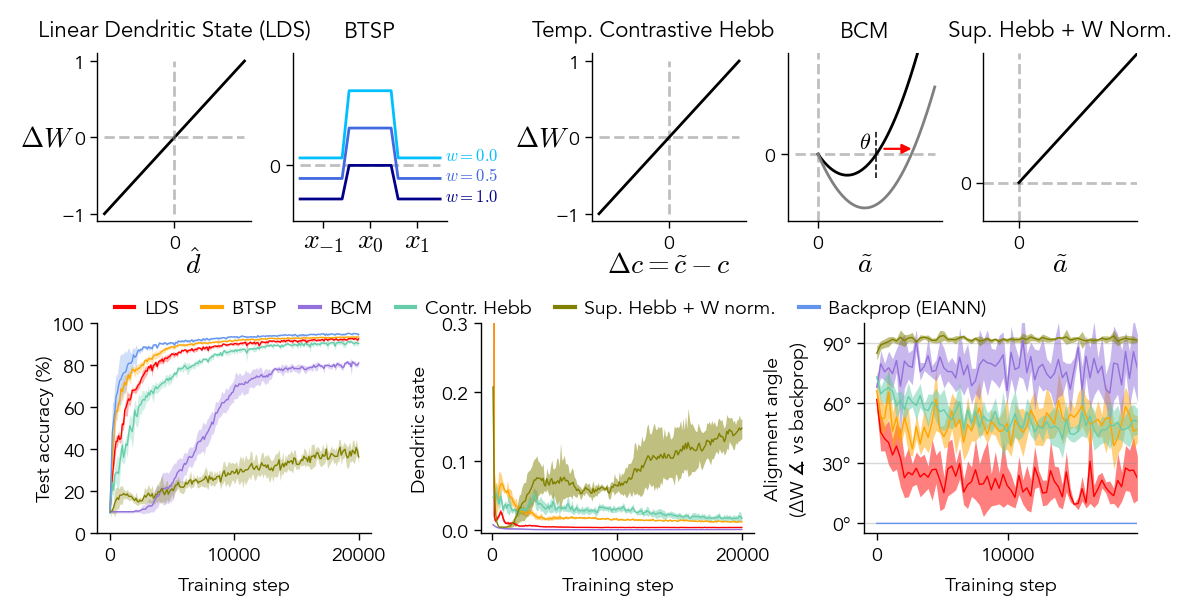

In [6]:
fig = plt.figure(figsize=(6.5, 3))

axes_diagram = gs.GridSpec(nrows=1, ncols=6, figure=fig,                       
                    left=0.1,right=0.9,
                    top=0.9, bottom = 0.62,
                    wspace=0.3, hspace=0.6, 
                    width_ratios=[1,1,0.4,1,1,1])

plot_learning_rule_diagram(axes_list=[fig.add_subplot(axes_diagram[i]) for i in range(6) if i!=2])


axes_plots = gs.GridSpec(nrows=1, ncols=3, figure=fig,                       
                    left=0.1,right=0.9,
                    top=0.45, bottom = 0.1,
                    wspace=0.4, hspace=0.6)
ax_accuracy = fig.add_subplot(axes_plots[0])
ax_dendstate = fig.add_subplot(axes_plots[1])
ax_angle_vs_BP = fig.add_subplot(axes_plots[2])

model_dict_all["BTSP_WT_hebbdend"]["label"] = "BTSP"
model_dict_all["bpLike_WT_hebbdend"]["label"] = "LDS"

for model_key in model_list:
    model_dict = model_dict_all[model_key]
    network_name = model_dict['config'].split('.')[0]
    hdf5_path = root_dir + f"/EIANN/data/model_hdf5_plot_data/plot_data_{network_name}.h5"
    with h5py.File(hdf5_path, 'r') as f:
        data_dict = f[network_name]
        print(f"Generating plots for {model_dict['label']}")
        plot_accuracy_all_seeds(data_dict, model_dict, ax=ax_accuracy)
        plot_dendritic_state_all_seeds(data_dict, model_dict, ax=ax_dendstate)
        plot_angle_vs_bp_all_seeds(data_dict, model_dict, ax=ax_angle_vs_BP)

legend = ax_accuracy.legend(ncol=6, bbox_to_anchor=(-0., 1.2), loc='upper left')
for line in legend.get_lines():
    line.set_linewidth(1.5)

fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.png", dpi=300)
fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.svg", dpi=300)